# Understanding Bristol's BnB Market

## CS986 - Assignment
Francesco Giuseppe Mascia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BnB = pd.read_csv("BristolAirbnbListings.csv")

## 1. Project's Tasks

Airbnb, Inc. is an American company that operates an online marketplace and hospitality. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences (Wikpedia, Airbnb).

The Airbnb dataset allows to range over I wide variety of analysis. In this report, the key challenges will be split into three phases across four chapters. Each phase will go into detail about a different aspect of the analysis, using different suitable methods for different purposes.

The first phase (2) will focus on data exploration and visualisation, gathering a first wide knowledge of basic information. During this process a basic knowledge about the data structure will be provided using summary table. Moreover a geographical representation will be elaborated in order to give a physical point of reference which will be a support for the forthcoming analysis.

The second phase (3) will tackle one of the most sizeble issues of the dataset, the messiness. The data will be accurately cleaned using a diverse set of techniques, in order to obtain two lean and manageable new data frames, an essential step before going through the next steps.

The section 4 will go into detail regarding what really is the key challenge of this analysis. 
###### "Can somehow price and reviews be predicted only having the information which are normally available to households?"

In section 4.1 the task will be to build a model that could give the households a suggested price for their property, to achieve this objective a regression algorithm will be used, specifically a random forest regressor has been choosen. The objective is to provide a guideline for new households approaching Airbnb (in Bristol) on what range of price could be advisable for their property. 

In section 4.2 the review will be taken into account. Being one of the most precious resources the site can provide, would be a clever idea to try gathering as much as possibile from them. It would be very useful to households to be able to forecast what kind of score their property could get on the site. This last task proved to be particularly difficult, an attempt will be made using different types of SVM classification algorithm.

## 2. Summarising and Visualizing the Data 

In this chapter a diverse set of technique will be used to represent the data as better as possible, highlighting the relevant features, with a particular focus on those that will be furtherly used during the analysis. The following functions: info, describe, and head are enough to give a rough idea of what the data looks like in practice, and other details such as the data types, the range and insights about each (numeric) column.
As it can be seen the dataset has 2375 rows and 28 columns, different data types as well as null values can be found.

In [3]:
BnB.head(5)

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,...,2.10,96,10,9,10,10.0,10.0,10.0,5,44
1,117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,...,1.40,99,10,10,10,10.0,10.0,10.0,1,360
2,146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,...,0.76,91,9,8,9,10.0,9.0,9.0,2,46
3,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,NaN,51.441006,-2.601208,Townhouse,Private room,...,0.41,95,9,9,10,10.0,9.0,9.0,2,57
4,220956,"Light, Modern, 1st Floor Apartment.",1145941,Stephen,Bedminster,England,51.438517,-2.601421,Apartment,Entire home/apt,...,0.85,94,10,9,10,10.0,9.0,9.0,1,253


In [4]:
BnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 28 columns):
id                                2375 non-null int64
name                              2375 non-null object
host_id                           2375 non-null int64
host_name                         2375 non-null object
neighbourhood                     2375 non-null object
postcode                          2326 non-null object
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null object
room_type                         2375 non-null object
accommodates                      2375 non-null object
bathrooms                         2372 non-null object
bedrooms                          2372 non-null object
beds                              2372 non-null object
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_revie

In [5]:
BnB.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
count,2.375000e+03,2.375000e+03,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2069.000000,2037.000000,2035.000000,2035.000000,2375.000000,2375.000000
mean,1.916208e+07,7.069285e+07,51.461004,-2.590871,76.600842,2.825263,31.608842,2.193823,9.832597,9.555283,9.474693,6.943579,121.521263
std,7.605464e+06,6.414426e+07,0.016149,0.025749,129.165841,13.122816,51.215247,2.197518,0.577031,0.670538,0.802358,16.766377,128.369568
min,7.082000e+04,5.253600e+04,51.404299,-2.701418,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.400028e+07,1.929395e+07,51.452411,-2.607064,35.000000,1.000000,2.000000,0.570000,10.000000,9.000000,9.000000,1.000000,0.000000
50%,2.043719e+07,4.763294e+07,51.460520,-2.592629,59.000000,2.000000,11.000000,1.450000,10.000000,10.000000,10.000000,1.000000,71.000000
75%,2.563622e+07,1.156455e+08,51.469853,-2.578521,85.000000,2.000000,38.000000,3.100000,10.000000,10.000000,10.000000,3.000000,225.500000
max,3.009993e+07,2.261455e+08,51.512555,-2.514635,5000.000000,365.000000,477.000000,18.030000,10.000000,10.000000,10.000000,78.000000,365.000000


Moreover, it would be interesting to have a look at the composition of categorical values, especially those which will be used during the analysis, room_type, property_type and neighbourhood.

In [6]:
room=BnB['room_type'].value_counts()
property=BnB['property_type'].value_counts()
neighbourhood=BnB['neighbourhood'].value_counts()
categorical=(room,property,neighbourhood)
categorical

(Entire home/apt    1252
 Private room       1116
 Shared room           7
 Name: room_type, dtype: int64, Apartment                        925
 House                            838
 Townhouse                        233
 Serviced apartment               188
 Bed and breakfast                 48
 Loft                              19
 Guesthouse                        14
 t                                 13
 Guest suite                       13
 Camper/RV                         11
 Bungalow                          11
 Condominium                       10
 Other                              9
 f                                  6
 Cabin                              5
 Cottage                            4
 Yurt                               3
 Hut                                3
 Hotel                              3
 Boat                               3
 Hostel                             2
 Barn                               2
 Shepherd's hut (U.K., France)      2
 Tiny house         

The property_type contains very noisy data, which will be taken care of in the following chapters of the analysis. So far these three features can be simply summarised as follows.

In [7]:
roomdf = [['Entire home/apt', 1252], ['Private room', 1116], ['Shared room', 7]]
roomdf = pd.DataFrame(roomdf,columns=['room_type','count'])
roomdf

,room_type,count
0,Entire home/apt,1252
1,Private room,1116
2,Shared room,7


In [8]:
propertydf = [['Apartment', 925], ['House', 838], ['Townhouse', 233], ['Serviced apartment', 188], ['Bed and breakfast', 48], ['Loft', 19], ['Guesthouse', 14],['Gues suite', 13],['Camper/RV', 11], ['Bungalow', 11], ['Condo', 10], ['Other', 40]]
propertydf = pd.DataFrame(propertydf,columns=['property_type','count'])
propertydf

,property_type,count
0,Apartment,925
1,House,838
2,Townhouse,233
3,Serviced apartment,188
4,Bed and breakfast,48
5,Loft,19
6,Guesthouse,14
7,Gues suite,13
8,Camper/RV,11
9,Bungalow,11


Only three room types can be observed in the dataset, the far most common options are either to have the entire flat or just a private room. On the other hand a great variety of property type showed up, as aspected house and apartment are the most common options, but a relevant amount of less conventional venue, such as a camper, can be found.

As the price will be one of the major focus of the analysis, a few visualisation regarding this feature are following produced. The first one looks at the average price distribution among the different neighbourhood. As we can observe from the histogram Brislington East is the most expensive one on average with a mean price of around 120£. At the opposite end Stockwood is the cheapest one, an Air BnB in this district costs 20£ on average.

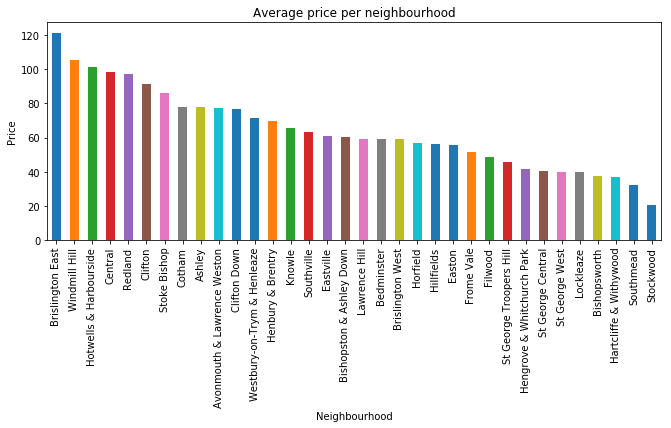

In [9]:
b=BnB.groupby('neighbourhood')
b1=b['price'].mean().sort_values(ascending=False)
b1
plt.figure(figsize=(11,4))
b1.sort_values(ascending=False).plot.bar()
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Average price per neighbourhood')
plt.show()

In order to give a physical reference to the topic under analysis, it is appropriate to visualise the data using a real map. A screenshot of Bristol has been taken from Google Maps, using precise fixed coordinates which have then been used as a reference to print the scatterplot over it.

In [10]:
BnBMap=BnB[['latitude','longitude','price']]
BnBMap.loc[BnBMap['price'] > 150, 'price'] = 150
# Given the presence of outlier in the price column, this passage is important to assure 
# a readable colorbar, hence all the values above 150 have been downsized to 150.
# A different dataset has been produced to apply this modification which will only be used to 
# have a more pleasing visualisation on this specific map.

C:\Users\franc\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


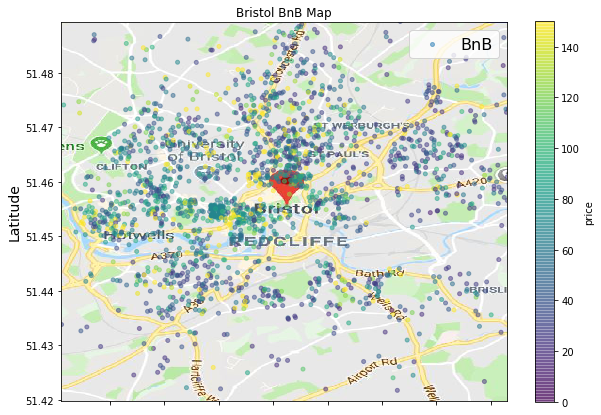

In [11]:
# In the following graph, the BnBs have been plotting over a map of the city, a colorbar related to price has been added
# in order to gather how the price ranges across the different areas.
# The map has been taken from Google Maps, cropping a square of coordinates which has then been report in the code,
# this method should assure (with farily good precision) the point of the scatterplot in their real physical position.

import matplotlib.image as mpimg
bristol_img=mpimg.imread('Bristol_map.jpg') # load the map into Python, must be in the same directory
ax = BnBMap.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=16, label="BnB", c="price",
                       cmap='viridis',
                       colorbar=True, alpha=0.5,
                       )

plt.imshow(bristol_img, extent=[-2.629, -2.547, 51.41977, 51.48933], alpha=1) # extent the image on a plane, using the coordinates previously set to get screenshot
plt.xlabel("Longitude", fontsize=14) #not showing(?)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=16)
plt.title('Bristol BnB Map')
plt.show()

It doesn't really surprise that the highest density of BnB is in a range of few kilometres from the centre, with an interesting concentration alongside the river. The price is quite uniformely distributed, apart from the east end which shows to be cheaper than the rest as not many yellow point can be seen there.

At this point it would be sensate to visualise the other feature under analysis, the reviews. Anyway, the review column needs cleansing in order to be properly helpful. Insights and visualization of it are furtherly provided at the end of next section, along with a final summary of the other relevant data which needed a transformation (beds, accommodates, etc.). 

##### see [ Visualization ]

## 3. Data Cleaning and Preparation

During this chapter the data will undergo a cleaning process which will result on a more lean and manageable dataset.
The dataset is characterized by an aboundancy of null values as it was evident from the second chapter. Especially the review column, where more than the 20% of the total data points are null. Moreover, many of the features we will furtherly need for the analysis are categorical, some of them will be encoded (room_type, property_type, neighbourhood) some others are actually numerical values already (beds, bedrooms, etc.) and they only need to be converted from obj to int, this convertion can be sometimes a very risky procedure and needs to be pursued carefully. A quite sizeable cleaning will be operate during this chapter, explaining in detail every delicate step.

In [12]:
# Let's check there are no duplicates
BnB['id'].value_counts(ascending=False).head()
# No id repeats more than once, so there are no duplicates

29792253    1
20446547    1
30080279    1
29381958    1
26287429    1
Name: id, dtype: int64

In [13]:
# This first step takes care of those categorical values which are really numeric attributes. I only focused on those
# that will be useful to the task.
BnB['beds'] = pd.to_numeric(BnB['beds'], downcast='signed', errors='coerce')
BnB['beds']=BnB['beds'].real.astype(int,casting='unsafe')
BnB['bedrooms'] = pd.to_numeric(BnB['bedrooms'], downcast='signed', errors='coerce')
BnB['bedrooms']=BnB['bedrooms'].real.astype(int,casting='unsafe')
BnB['bathrooms'] = pd.to_numeric(BnB['bathrooms'], downcast='signed', errors='coerce')
BnB['bathrooms']=BnB['bathrooms'].real.astype(int,casting='unsafe')
BnB['accommodates'] = pd.to_numeric(BnB['accommodates'], downcast='signed', errors='coerce')
BnB['accommodates']=BnB['accommodates'].real.astype(int,casting='unsafe')
BnB['review_scores_rating'] = pd.to_numeric(BnB['review_scores_rating'], downcast='signed', errors='coerce')
BnB['accommodates'].value_counts() # let's see the result

 2             1153
 4              432
 1              271
 6              164
 3              109
 5               84
 8               50
 7               32
-2147483648      22
 10              16
 9               14
 16              10
 14               6
 12               6
 11               4
 15               1
 13               1
Name: accommodates, dtype: int64

In [14]:
# As it as been said before this procedure can be risky, if we observe the value counts for the columns now, 
# we can see a few anomalies, these can be related to the unsafe casting operate on noise data. In this case
# non-numerical data points, have been converted to something like -2147483648, since they are
# only a minority the most simple way to take care of it is to force them into > 0.
BnB = BnB.ix[BnB['bathrooms'] >= 0]
BnB = BnB.ix[BnB['accommodates'] >= 0]
BnB = BnB.ix[BnB['beds'] >= 0]
BnB = BnB.ix[BnB['bedrooms'] >= 0]

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is 

The remaining categorical features will be encoded into numerical, in order to do this, the target encoding method has been choosen. The logic behind it is to encode each category using the mean of the target for that specific category. The target of the analysis will be in one case the price and in the other the review_score, so two sets of encoding will be performed.The following function works to define the smooth mean for the different categories for a given feature and a given target.
The smooth component adds some noise to the mean, with the purpose of reduce the bias that usually characterize this method.

In [15]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [16]:
# Here the target encoding function is applied to the two sets of variables, the first 
# using price as a target, the second one considers the review_score.

BnB['room_typeP'] = calc_smooth_mean(BnB, by='room_type', on='price', m=10)
BnB['property_typeP'] = calc_smooth_mean(BnB, by='property_type', on='price', m=10)
BnB['neighbourhoodP'] = calc_smooth_mean(BnB, by='neighbourhood', on='price', m=10)

BnB['room_typeR'] = calc_smooth_mean(BnB, by='room_type', on='review_scores_rating', m=10)
BnB['property_typeR'] = calc_smooth_mean(BnB, by='property_type', on='review_scores_rating', m=10)
BnB['neighbourhoodR'] = calc_smooth_mean(BnB, by='neighbourhood', on='review_scores_rating', m=10)

# The encoding gives as output float64, which can sometimes problematic for algorithms, hence 
# the same type-converting code from a few lines up is applied to the new variables.

BnB['room_typeP']=BnB['room_typeP'].real.astype(int,casting='unsafe')
BnB['property_typeP']=BnB['property_typeP'].real.astype(int,casting='unsafe')
BnB['neighbourhoodP']=BnB['neighbourhoodP'].real.astype(int,casting='unsafe')
BnB['room_typeR']=BnB['room_typeR'].real.astype(int,casting='unsafe')
BnB['property_typeR']=BnB['property_typeR'].real.astype(int,casting='unsafe')
BnB['neighbourhoodR']=BnB['neighbourhoodR'].real.astype(int,casting='unsafe')

BnB = BnB.ix[BnB['room_typeP'] >= 0]
BnB = BnB.ix[BnB['property_typeP'] >= 0]
BnB = BnB.ix[BnB['neighbourhoodP'] >= 0]
BnB = BnB.ix[BnB['room_typeR'] >= 0]
BnB = BnB.ix[BnB['property_typeR'] >= 0]
BnB = BnB.ix[BnB['neighbourhoodR'] >= 0]

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please

The next problem is given by the aboundancy of missing values in the review_scores_rating column, the missing values are around the 20% of the total dataset, moreover, the absence of reviews is in this case a precious information, so dropping is not an option!
In order to use this feature I will transform it from numerical to categorical, I will divide the rating in classes based on the percentiles values (100,97,93) plus a separate category for null values:
Class1=100, Class2>97, 97>CLass3>93, Class4<93, No_reviews=Null

In [ ]:
def label_rating (row):
   if row['review_scores_rating'] == 100.0 :
      return 'Class1'
   if row['review_scores_rating'] == 99.0:
      return 'Class2'
   if row['review_scores_rating'] == 98.0 :
      return 'Class2'
   if row['review_scores_rating'] == 97.0 :
      return 'Class2'
   if row['review_scores_rating'] == 96.0 :
      return 'Class3'
   if row['review_scores_rating'] == 95.0 :
      return 'Class3'
   if row['review_scores_rating'] == 94.0 :
      return 'Class3'
   if row['review_scores_rating'] == 93.0 :
      return 'Class3'
   if row['review_scores_rating'] < 93.0 :
      return 'Class4'

In [ ]:
BnB.apply (lambda row: label_rating (row),axis=1)
BnB['rating_label'] = BnB.apply (lambda row: label_rating (row),axis=1)
BnBxx=BnB['rating_label'].fillna('No_reviews')
BnB['rating_label']=BnBxx
BnB['rating_label'].value_counts()
# As we can see now the new column rating lavel displays 5 classes of reviews

##### from section 2 [ Visualization ]
As mentioned in the previous section, here it is provided a visualistion for the rewies data, the first graph displays the density distribution of the reviews as integers, as we can see they are mostly herded in the range 90-100, the lines indicate the class division in the four percentiles branches (the far right one overlaps 100). On the right the final class division is shown, here unlike the first one, the No_reviews data is considered.

In [ ]:
bins=int(100/1)
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
plt.hist(BnB['review_scores_rating'], color = 'yellow', edgecolor = 'black',
         bins = bins)
plt.xlim(55,100)
plt.xlabel('Rating score')
plt.ylabel('BnBs')
plt.title('Rating distribution')
plt.axvline(x=93)
plt.axvline(x=97)
plt.axvline(x=100)

plt.subplot(1, 2, 2)
pd.value_counts(BnB['rating_label']).plot.bar(rot=0)
plt.xlabel('Rating class')
plt.title('Rating classes')
plt.show()

##### from section 2 [ Visualization ]
The house features are now available as integers and can be than easily summarised with the following function. An interesting caption is that a few locations don't have any bathroom or bedroom. Some others have up to 13 bedrooms, housing up to 24 people. On average the host requires a minimum 3 nights stay, but there seems not to be a maximum limit. The price has a very wide range across the city, from 0 to 5000£.

In [ ]:
description=BnB.describe()
description[['accommodates','bathrooms','bedrooms','beds','price','minimum_nights']]

At this point the data has been cleansed and prepared, the final step is to choose the features and create two new datasets, each one will be used for one specific model in the next chapter:
 - Price_Model: accommodates, beds, bathrooms, bedrooms, minimum_nights, room_typeP, property_typeP, neighbourhoodP, price
 - Review_Model: accommodates, beds, bathrooms, bedrooms, minimum_nights, room_typeR, property_typeR, neighbourhoodR,     rating_label

In [ ]:
# BnBReg will be the dataset for the Price_Model
BnBReg=BnB[['accommodates','beds','bathrooms','bedrooms','minimum_nights','room_typeP','property_typeP','neighbourhoodP','price']]
BnBReg.head()

In [ ]:
# BnBClass will be the dataset for the Review_Model
BnBClass=BnB[['accommodates','beds','bathrooms','bedrooms','minimum_nights','room_typeR','property_typeR','neighbourhoodR','rating_label']]
BnBClass.head()

## 4. Models, Application and Validation

This chapter will go into detail in what really is the heart of the analysis. Two different supervised algorithm have been choosen to craft the models, rationale, application and validation will be deepen in 4.1 and 4.2.

### 4.1. Random Forest Regressor and Price Model

The Price Model aims to give Airbnb users (hosts) a point of reference regarding the price of their new BnB, base on the following features of their property: accommodates, beds, bathrooms, bedrooms, minimum_nights, room_type, property_type, neighbourhood. The model should allow them, to get a suggested price that alines with the current BnB market in Bristol, the adopted criterion could be easily transfered to other cities.
The Random Forest Regressor algorithm has be choosen to perform the regression. A Random Forest is a type of ensemble learning which works by aggregating a set of Decision Trees via Bagging (same algorithm, different training subsets). This method is a supervised algorithm, hence it works by gathering knowledge from the data structure provided, a process know as "training". During the training phase the algorithm learns how to match the features information at hand to the target feature under analysis (price). The training results into a general knowledge that the model can later use to predict unknown target only knowing the features.
The following two steps divide the dataset into four arrays: train predictors and target, which will be used to train the model (75% of total data), and test predictors and target which will be used to test the model's performance (25% of total data).

In [ ]:
# Transform the data in two arrays
target = np.array(BnBReg['price'])
predictors = BnBReg.drop('price', axis = 1)
predictors_list = list(predictors.columns)
predictors = np.array(predictors)

In [ ]:
# Train and test sets
from sklearn.model_selection import train_test_split
train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target, test_size = 0.25, random_state = 42)

Random Forest has been selected specifically as one of the most powerfull algorithm available to perform regression tasks. Moreover a very positive feature is that it is not sensitive to the data scale. Hence the data doesn't need to undergo a scaling procedure which can sometime be matter of issues, the model input is then just the real values of the house features, an attribute that can someone help Random Forest to be more straight forward and user friendly compared to other methods. In order to have a baseline of comparison a Linear Regression Model has been tested along with the RF, as the results will show, the RF outperforms the linear regression, confirming it to be an appropriate choice.

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()
lrBaseline = regr.fit(train_predictors, train_target)
predictionsBaseline = lrBaseline.predict(test_predictors)

errorsBaseline = abs(predictionsBaseline - test_target)
maeBaseline = round(np.mean(errorsBaseline), 2) # Mean Absolute Error
mean = round(np.mean(test_target),2) # mean test set
std = round(np.std(test_target),2) # standard deviation test set
df1 = [['maeBaseline', maeBaseline], ['mean', mean], ['std',std]]
comparisonBaseline = pd.DataFrame(df1,columns=['metric','score'])
comparisonBaseline

The Linear Regression Baseline Model scored a Mean Absolute Error of 33.25, the other two values are respectively the actual mean and std of the test_target dataset. Let's see if the Random Forest can do any better. Five different RF has been trained, respectively 10, 100, 500, 1000, and 2000 trees in order to compare the results among ensembles of different sizes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Training the model
rf10 = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf100 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf500 = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf1000 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2000 = RandomForestRegressor(n_estimators = 2000, random_state = 42)
# random_state=42 controls the "randomness" in order to check and validate the data when running the code multiple times

In [ ]:
rf10.fit(train_predictors, train_target)
rf100.fit(train_predictors, train_target)
rf500.fit(train_predictors, train_target)
rf1000.fit(train_predictors, train_target)
rf2000.fit(train_predictors, train_target)

In [ ]:
# Testing
predictions10 = rf10.predict(test_predictors)
predictions100 = rf100.predict(test_predictors)
predictions500 = rf500.predict(test_predictors)
predictions1000 = rf1000.predict(test_predictors)
predictions2000 = rf2000.predict(test_predictors)

In [ ]:
errors10 = abs(predictions10 - test_target)
errors100 = abs(predictions100 - test_target)
errors500 = abs(predictions500 - test_target)
errors1000 = abs(predictions1000 - test_target)
errors2000 = abs(predictions2000 - test_target)

mae10 = round(np.mean(errors10), 2) # Mean Absolute Error
mae100 = round(np.mean(errors100), 2)
mae500 = round(np.mean(errors500), 2)
mae1000 = round(np.mean(errors1000), 2)
mae2000 = round(np.mean(errors2000), 2)

df2 = [['rf10', mae10], ['rf100', mae100], ['rf500', mae500], ['rf1000', mae1000], ['rf2000',mae2000]]
comparisonRF = pd.DataFrame(df2,columns=['size','mae'])
comparisonRF

All the five models performed better than the Baseline proving that RF had a good performance. The ComparisonRF shows that the mae generally decreases for bigger ensembles.
Considering the trade-off time/performance the rf500 could be considered an advisable solution, since for more than 2000 trees the computation time starts being remarkable.

What also characterizes RF is the capability to measure the relative importance of each feature. A clear visualisation is provided using an histogram as follow.

In [ ]:
# Importance
importances = list(rf500.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictors_list, importances)]

In [ ]:
x_values = list(range(len(importances)))
plt.figure(figsize=(12,4))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, predictors_list, rotation='horizontal')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

Clearly, accommodates, beds and bathrooms are the features which contribute the most in defining the model, while minimum_nights contributes almost nothing.

### 4.2. Support Vector Classifier and Rating Forecasting

The SVM Classifier has been choosen for the classification task. Support Vector Machine is, as well, a Supervised algorithm, it is ideal for small but complex dataset has the one currently under analysis. SVM is sensitive to the data scale, in this case the data the data will be standardized before been used.

When dealing with a classifier the splitting better not to be random. In order to assure a feasible training, it is important that the original proportion of the classes is kept in both the training and the test sets. E.g. if all the Class3 instances would be assigned to the test set, the algorithm would not learn how to predict that specific class.

In [ ]:
# Stratified split that keeps the original proportions.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
random_state=42)
for train_index, test_index in split.split(BnBClass, BnBClass["rating_label"]):
  strat_train_set = BnBClass.loc[train_index]
  strat_test_set = BnBClass.loc[test_index]

In [ ]:
# Get rid of the null values that for some reason incurred after the splitting
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

# Separate predictors and target
train_predictorsC = strat_train_set.drop('rating_label', axis=1)
train_targetC = strat_train_set['rating_label']
test_predictorsC = strat_test_set.drop('rating_label', axis=1)
test_targetC = strat_test_set['rating_label']

As it has been said before, the SVM algorithm is sensible to the scale, I decided to use a Pipeline to perform the scale, a pipeline allows to incorporate multiple functions in a single code, running them on a sequence. This way the scaling is included in the model. It makes it easier to make predictions for new data, since the scaling is automatic.

In [ ]:
# Train the Algorithm 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm_clf_lin = Pipeline([("scaler",StandardScaler()),("linear_svc", SVC(kernel='linear')),
                       ])
                         
svm_clf_lin.fit(train_predictorsC, train_targetC)  
svm_clf_lin.predict([[2,3,4,1,4,44,55,22]]) 
# example, prediction for random data, no need to scale

The model is now tested using the test set, the results can be evaluated using the following metrics:
- Confusion matrix: a table where the diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.
- Precision: the accuracy of the positive predictions.
- Recall: the ratio of positive instances that are correctly detected by the classifier.
- F1-score: a measure that combines precision and recall, using an harmonic mean.

In [ ]:
y_pred = svm_clf_lin.predict(test_predictorsC)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_targetC,y_pred))  
print(classification_report(test_targetC,y_pred))

Moreover a new model is trained using the 'kernel trick' which allows to add many polynomial features without actually adding them. This method is likely to improve the performance, especially when dealing with medium-low numers of features, as only 8 in this case.

In [ ]:
# Polynomial
svm_clf_pol = Pipeline([("scaler",StandardScaler()),("polynomial_svc", SVC(kernel='poly', degree=5, coef0=1, C=5))
                       ])
svm_clf_pol.fit(train_predictorsC, train_targetC)  

In [ ]:
y_pred2 = svm_clf_pol.predict(test_predictorsC)  
print(confusion_matrix(test_targetC, y_pred2))  
print(classification_report(test_targetC, y_pred2)) 

Comparing the parameters previously listed, none of the models outlined great results, only a small percentage of the instances were correctly classifed only the 30% of Class 1 and 2, and literally none of the No_review category when using the linear model. Nonetheless the polynomial model confirmed a performance slightly better than the linear one. Despite the quite disappointing results, this can be set as a starting point for a few hypothesis as it will be reported in the next section.

## 5. Reflection on the Methods and Conclusion

During this analysis a plethora of methods has been utilized, gaining knowledge from different angles.

Descriptive statistics in section 2 provided some interesting insights, especially regarding
the geographical distribution of price among the diffent areas of the city. The BnB Price Map confirmed the logical idea of higher prices in the town centre, also it outlined a concentration of BnBs along the West part of the river, could that be related to a particular nice view?

In chapter 4.1 the Random Forest algorithm reported quite interesting results. Overall the RF performed better than the linear regression giving a price which only drifts on average by 24 from the "real" one. The features that most affected the price prediction showed to be the accommodates, beds and bathroom numbers. Despite being far from perfection the Price Model can predict the price with an accuracy of around the 70%, which can be considered a fairly good result for a dataset of extremely high variance (82 vs a mean of 75). In conclusion the Price Model alines with the original task of providing an helpful tool to new Airbnb hosts. This way will be possible for households to receive a suggested price for their property, based on the current Airbnb market of their area.

In chapter 4.2 the SVM Classifier proved how difficult it is to predict something related to the mere human perception like BnB reviews. Two types of SVC were tested but none of them achieved a reliable standard of classification. In particular, the No_review class proved to be extremely difficult to predict, this could be a signal that those BnBs didn't miss reviews di per se, most likely the absence of information is related to some kind of error, so what it actually appears as No_reviews should really belong to one of the other classes, hence the algorithm try to classify it in the class it truly belongs. Due to this issue and the excessive similarity among the rating classes (90% of the reviews exceeds 90/100) the model didn't achieve the desired goal. Anyway, I am confident to state that the algorithm could perform better over better quality data.

In conclusion, despite the high complexity of the data at hand, a marginal but encouraging understanding of the Bristol BnB market has been reached, and a fairly reliable Price Adsiving Model has been formulated.

## References

- Wikipedia.org. Wikipedia/Airbnb. [online] Available at: https://en.wikipedia.org/wiki/Airbnb

- Géron A. (2017). Hands-On Machine Learning with Scikit-Learn & Tensorflow. 5th ed. Sebastopol, US. O’Reilly Media, Inc.

- Google.com. Google/Maps/Place/Bristol. [online] Available at: https://www.google.com/maps/place/Bristol/@51.4540961,-2.6141456,12.96z/data=!4m5!3m4!1s0x4871836681b3d861:0x8ee4b22e4b9ad71f!8m2!3d51.454513!4d-2.58791 

- Downard I. (2017). How to plot data on maps in Jupyter using Matplotlib, Plotly, and Bokeh. Big Endian Data.
[online] Available at: http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

- Halford M. (2018). Target encoding done the right way. MaxHalford.github.
[online] Available at: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/ 